In [ ]:
0) il faut faire une explorations des données 
1) detecter les valeurs manquantes
1.1) supprimer les valeurs manquantes, ily'a des critéres, par example
colonne kilo (on a plus de 60% des valeurs manquantes)
1.2) remplacer (fonctions statistiques,prédiction)
2) detecter les valeurs abberantes
2...
3) normalisation ou standarzidation (plusieurs méthodes)
4) encoding (transformation) des valeurs catégoriques:(nominal et ordinal) en valeurs numériques
4.1 ) label encoder (colonne=couleurs
(rouge,vert,noir)==>{"rouge":1,"vert":2,"noir":3})
4.2 ) one hot encoding ()

5) feature selection
5.1 ) je peux supprimer en se basant sur ma comprehension des données et de la problematique
5.2) étude de correlation entre les caractéristiques (visualization et calcule de correlation)
5.3 ) méthode de machine learning (feature selection RFE)
# on a fini preprocessing
6) séparation des données (on a 1000 points (1 = training 2 = testing ) source 1 && 3 = validation)
7) application d'algorithm 1 et 2 ...
8) étude de performances (il y'a plusieurs mesure de performances)
9) si la performance n'est pas assez bien, soit il faut réflichir à refaire une certaine étape du preprocessing 
ou bien  augmenter les données (refaire le scrapping) ou bien changer l'algorithm ou les parametres de l'algorithm...

In [5]:
import pandas as pd
import requests #requests bilbiothèque qui permet de collecter le code source d'une page avec un format unitilisable
from bs4 import BeautifulSoup #permet de normaliser le format pour qu'il soit utilisable et selectionnable
import re # pour les expressions régulieres
#selenium

In [2]:
url = "https://www.avito.ma/fr/maroc/v%C3%A9hicules-%C3%A0_vendre"
page = requests.get(url)
pageSoup = BeautifulSoup(page.content,"html.parser")

ConnectionError: HTTPSConnectionPool(host='www.avito.ma', port=443): Max retries exceeded with url: /fr/maroc/v%C3%A9hicules-%C3%A0_vendre (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025919DB25F8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [ ]:
page = requests.get(url)
page.status_code

In [4]:

while True:  
    try:
        page = requests.get(url)
        print(page.status_code)
        if page.status_code==200:
            break
        else:
            print("not")
    except:
        continue
#         try:
#             page = requests.get(url)
#             print(page.status_code)
#             if page.status_code == 200:
#                 break
#         except:
#             continue

    

200


In [ ]:
container = pageSoup.find("div",{"class":"sc-116g21e-1 sc-116g21e-2 jvnaxw fpnWoz"})
aTags = container.find_all("a")
values = []
for aTag in aTags:
    value = aTag.get_text()
    if value.isdigit():
        values.append(int(value))
valuesMax = max(values)

In [ ]:
dict1 = {"prices":[10,20,30,40],"brand":["dacia","seat","golf","ferrari"]}
df = pd.DataFrame(dict1)
df.to_csv("cars.csv")

In [ ]:
mainUrl = "https://www.avito.ma/fr/maroc/v%C3%A9hicules-%C3%A0_vendre?o="
prices = []
for i in range(1,valuesMax):
    url = mainUrl+str(i)
    print(url)
    page = requests.get(url)
    pageSoup = BeautifulSoup(page.content,"html.parser")
    container = pageSoup.find("div",{"class":"sc-1nre5ec-0 gpXkJn listing"})
    regex = re.compile('adListCard*')
    elements = container.find_all("div",{"data-testid":re.compile(regex)})
    for element in elements:
        try:
            divPrice = element.find("div",{"class":"oan6tk-5 fdibtT"})
            price = divPrice.find("span",{"data-testid":"adPrice"}).get_text()
            prices.append(price)
        except:
            print("ok")
    print(prices)
    
    break
   
            

##### container = pageSoup.find("div",{"class":"sc-1nre5ec-0 gpXkJn listing"})
regex = re.compile('adListCard*')
elements = container.find_all("div",{"data-testid":re.compile(regex)})
prices = []
for element in elements:
    prices.append(element.find("span",{"data-testid":"adPrice"}).get_text())
prices

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [ ]:
pattern = r'\$*'
# Match all digits in the string and replace them with an empty string
function = lambda x:re.sub(pattern, '', x)
chipo["item_price"] = chipo["item_price"].apply(function)
chipo["item_price"] = chipo["item_price"].astype(float)

In [ ]:
pattern = r'\$*'

re.sub(pattern, '', "$1$2$")

In [ ]:
import re

#original string
string1 = "9839yak88jkssir1996"

pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
new_string = re.sub(pattern, '', string1)

print(new_string)

In [ ]:
chipo

In [ ]:
chipo["item_name"].value_counts().keys()

In [ ]:
s.append(23)

In [ ]:
df = pd.DataFrame({"name":["yassir","driss","jalal"],"age":[26,30,20]},columns=["name","age"])
df.set_index("age")

In [ ]:
df.to_csv("names.csv")

In [ ]:
w = pd.read_csv("names.csv",index_col=0)
w

In [108]:
df = pd.read_csv("titanic-passengers.csv",sep=";")
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
    

                    }

In [109]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
titles = list(Title_Dictionary.keys())
columnTitle = []
for i, row in df.iterrows():
    for title in titles:
        titlee = title+"."
        if titlee in row["Name"]:
            columnTitle.append(title)
df["Title"] = columnTitle

In [40]:
df["Title"].replace(Title_Dictionary,inplace=True)

In [43]:
dicSurvived = {"No":0,"Yes":1}
df["Survived"].replace(dicSurvived,inplace=True)

In [48]:
dicSex = {"male":1,"female":0}
df["Sex"].replace(dicSex,inplace=True)
#Age, Cabin, Embarked ==> missing values

array([28.  , 25.  , 20.  , 29.  , 31.  , 37.  , 19.  ,  1.  , 20.5 ,
       42.  , 24.  , 48.  ,   nan, 17.  , 27.  , 32.  , 38.  , 45.  ,
       30.5 , 41.  , 60.  , 50.  , 30.  , 40.  , 34.  , 36.  ,  3.  ,
       16.  ,  7.  , 23.  , 44.  , 70.5 , 22.  , 26.  , 35.  ,  0.67,
       62.  , 43.  , 18.  , 33.  ,  2.  , 39.  , 55.  , 56.  , 59.  ,
       58.  , 65.  ,  9.  , 51.  , 54.  , 28.5 , 14.  , 13.  , 21.  ,
       46.  ,  4.  , 49.  , 47.  , 74.  , 11.  , 36.5 ,  6.  , 55.5 ,
       14.5 ,  5.  , 32.5 , 15.  ,  8.  , 57.  , 10.  , 40.5 , 34.5 ,
        0.75, 64.  , 63.  , 61.  , 80.  , 24.5 , 66.  ,  0.83, 71.  ,
       45.5 , 52.  , 70.  ,  0.92, 53.  ,  0.42, 12.  , 23.5 ])

In [53]:
df["AgeMean"] = df["Age"].fillna(df["Age"].mean(),inplace=False)

In [69]:
df["Cabin"].unique()

array([nan, 'F G73', 'B71', 'C82', 'C93', 'B41', 'C95', 'B38', 'C52',
       'A32', 'C111', 'C2', 'E101', 'D17', 'B22', 'B3', 'C45', 'B78',
       'A31', 'C128', 'C30', 'A26', 'C22 C26', 'D15', 'T', 'C54', 'C103',
       'C125', 'D20', 'C78', 'E24', 'B82 B84', 'E12', 'D9', 'D28', 'D19',
       'G6', 'D48', 'C90', 'D56', 'E33', 'B86', 'F2', 'B77', 'B39', 'F33',
       'D26', 'C85', 'A34', 'C92', 'F G63', 'D45', 'D', 'C91', 'B79',
       'D21', 'C32', 'C83', 'C47', 'B58 B60', 'E38', 'B28', 'E58', 'A16',
       'B20', 'C126', 'E77', 'B96 B98', 'C65', 'C123', 'C68', 'B35', 'B5',
       'C46', 'E10', 'B51 B53 B55', 'E68', 'B49', 'B30', 'F E69',
       'D10 D12', 'B57 B59 B63 B66', 'D11', 'D36', 'C99', 'D7',
       'C23 C25 C27', 'C106', 'B19', 'C124', 'E8', 'A23', 'A10', 'E31',
       'B73', 'B18', 'E46', 'D50', 'F38', 'B37', 'A7', 'A5', 'E67', 'D33',
       'C118', 'C7', 'A36', 'C62 C64', 'E34', 'D6', 'A6', 'B101', 'E44',
       'C70', 'A20', 'E121', 'C87', 'C50', 'B4', 'C104', 'C148', 'A1

In [75]:
cabinC = df["Cabin"].value_counts().keys()[0]
df["Cabin"].fillna(cabinC,inplace = True)

In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Cabin"])
cla = le.classes_
print(cla[63])
df["CabinEncoded"] = le.transform(df["Cabin"])

C23 C25 C27


In [104]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,CabinEncoded
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C23 C25 C27,S,Mrs,28.000000,63
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mrs,25.000000,140
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C23 C25 C27,S,Mrs,20.000000,63
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C23 C25 C27,S,Mrs,29.000000,63
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,31.000000,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C23 C25 C27,C,Mrs,14.000000,63
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,C23 C25 C27,C,Mrs,22.000000,63
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,C23 C25 C27,S,Miss,30.000000,63
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,349215,7.8958,C23 C25 C27,S,Mrs,29.699118,63


In [87]:
df["Embarked"].dropna(inplace = True)

In [106]:
le = pd.get_dummies(df["Title"])
dfNew = le.join(df)
dfNew

,Master,Miss,Mrs,Officer,Royalty,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,CabinEncoded
0,0,0,1,0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C23 C25 C27,S,Mrs,28.000000,63
1,0,0,1,0,0,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mrs,25.000000,140
2,0,0,1,0,0,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C23 C25 C27,S,Mrs,20.000000,63
3,0,0,1,0,0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C23 C25 C27,S,Mrs,29.000000,63
4,0,0,1,0,0,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,31.000000,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C23 C25 C27,C,Mrs,14.000000,63
887,0,0,1,0,0,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,C23 C25 C27,C,Mrs,22.000000,63
888,0,1,0,0,0,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,C23 C25 C27,S,Miss,30.000000,63
889,0,0,1,0,0,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,349215,7.8958,C23 C25 C27,S,Mrs,29.699118,63


In [102]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer(sparse_output = True)
lb.fit(df["Title"])
lb.transform(df["Title"]).toarray()

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [115]:
dfNew

,Master,Miss,Mrs,Officer,Royalty,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,CabinEncoded
0,0,0,1,0,0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C23 C25 C27,S,Mrs,28.000000,63
1,0,0,1,0,0,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mrs,25.000000,140
2,0,0,1,0,0,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C23 C25 C27,S,Mrs,20.000000,63
3,0,0,1,0,0,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C23 C25 C27,S,Mrs,29.000000,63
4,0,0,1,0,0,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,31.000000,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C23 C25 C27,C,Mrs,14.000000,63
887,0,0,1,0,0,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,C23 C25 C27,C,Mrs,22.000000,63
888,0,1,0,0,0,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,C23 C25 C27,S,Miss,30.000000,63
889,0,0,1,0,0,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,NaN,0,0,349215,7.8958,C23 C25 C27,S,Mrs,29.699118,63


In [125]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr(method = "kendall")

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 0.9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

<Figure size 1296x1008 with 0 Axes>

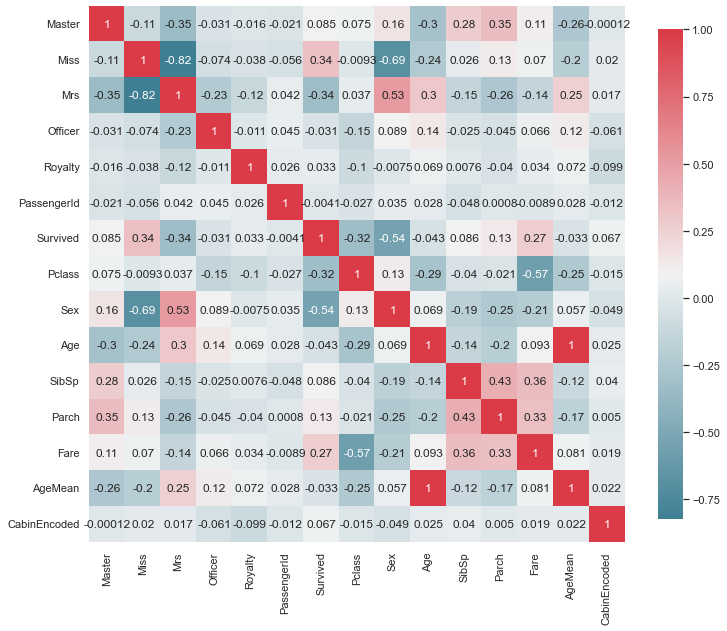

In [126]:
plt.figure(figsize=(18, 14))

plot_correlation_map(dfNew)

In [132]:
dfNew[dfNew["Royalty"]==1]

,Master,Miss,Mrs,Officer,Royalty,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,CabinEncoded
35,0,0,0,0,1,31,0,1,"Uruchurtu, Don. Manuel E",1,40.0,0,0,PC 17601,27.7208,C23 C25 C27,C,Royalty,40.0,63
398,0,0,0,0,1,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",0,48.0,1,0,11755,39.6000,A16,C,Royalty,48.0,2
521,0,0,0,0,1,823,0,1,"Reuchlin, Jonkheer. John George",1,38.0,0,0,19972,0.0000,C23 C25 C27,S,Royalty,38.0,63
659,0,0,0,0,1,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,49.0,1,0,PC 17485,56.9292,A20,C,Royalty,49.0,4
755,0,0,0,0,1,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.5000,B77,S,Royalty,33.0,40


<AxesSubplot:xlabel='Survived', ylabel='AgeMean'>

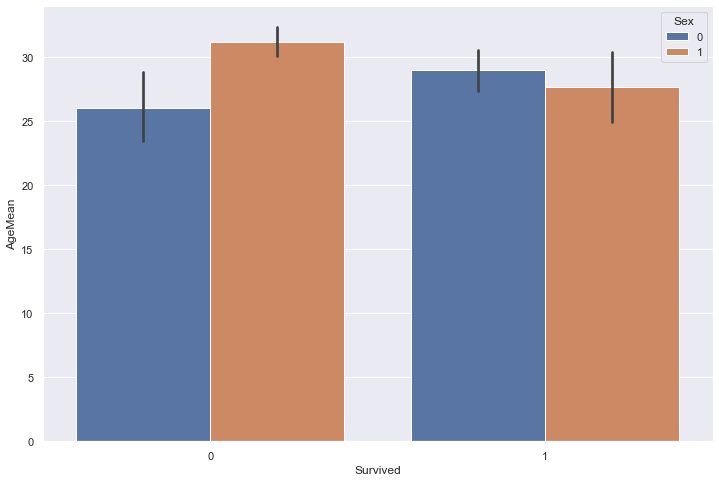

In [136]:
plt.figure(figsize=(12, 8))

sns.barplot(data=dfNew,x="Survived",y="AgeMean",hue="Sex")

In [147]:
dfNew["AgeMeanStand"] = (dfNew["AgeMean"]-dfNew["AgeMean"].mean())/dfNew["AgeMean"].std()

In [149]:
#standardization age
# from sklearn.preprocessing import stantardScaler
# stantardScaler
dfNew["AgeMeanStand"]

0     -0.130681
1     -0.361415
2     -0.745970
3     -0.053770
4      0.100052
         ...   
886   -1.207437
887   -0.592148
888    0.023141
889    0.000000
890   -0.822881
Name: AgeMeanStand, Length: 891, dtype: float64

In [150]:
dfNew["AgeMeanMinMax"] = (dfNew["AgeMean"]-dfNew["AgeMean"].min())/(dfNew["AgeMean"].max()-dfNew["AgeMean"].min())
dfNew["AgeMeanMinMax"]

0      0.346569
1      0.308872
2      0.246042
3      0.359135
4      0.384267
         ...   
886    0.170646
887    0.271174
888    0.371701
889    0.367921
890    0.233476
Name: AgeMeanMinMax, Length: 891, dtype: float64

In [ ]:
# regression linéaire

# y = a*x1+a2*x2+b